In [1]:
#电影数据分析
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#导入数据
credits_file='D:/wzl/kaggle/the movies/archive_new/tmdb_5000_credits.csv'
movies_file='D:/wzl/kaggle/the movies/archive_new/tmdb_5000_movies.csv'
credits=pd.read_csv(credits_file,encoding='utf-8')
movies=pd.read_csv(movies_file,parse_dates=['release_date'])#parse_dates 将release_date列设为日期格式
print('credits:',credits.shape,'movies:',movies.shape)

credits: (4803, 4) movies: (4803, 20)


In [3]:
#查看信息
print(credits.head(),movies.head())

   movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3",

In [5]:
#合并数据集 以title为关键词
full=pd.merge(credits,movies,left_on='title',right_on='title')

In [7]:
full.shape

(4809, 23)

In [8]:
full.head()

,movie_id,title,cast,crew,budget,genres,homepage,id,keywords,original_language,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124


In [10]:
###数据清洗 
#选择子集，选择与问题相关的特征数据
full=full[['id','title','vote_average','production_companies','genres',
     'release_date','keywords','runtime','budget','revenue','vote_count','popularity']]

In [11]:
#查看数据集信息
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    4809 non-null   int64         
 1   title                 4809 non-null   object        
 2   vote_average          4809 non-null   float64       
 3   production_companies  4809 non-null   object        
 4   genres                4809 non-null   object        
 5   release_date          4808 non-null   datetime64[ns]
 6   keywords              4809 non-null   object        
 7   runtime               4807 non-null   float64       
 8   budget                4809 non-null   int64         
 9   revenue               4809 non-null   int64         
 10  vote_count            4809 non-null   int64         
 11  popularity            4809 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 488.4+ K

In [12]:
###对缺失值进行处理 release_date runtime
#找到
full.loc[full['release_date'].isnull(),'title']

4559    America Is Still the Place
Name: title, dtype: object

In [13]:
#通过上网查到数据
full['release_date']=full['release_date'].fillna('2014-06-01')

In [14]:
#runtime 进行平均值填充
full['runtime']=full['runtime'].fillna(full['runtime'].mean())

In [16]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    4809 non-null   int64         
 1   title                 4809 non-null   object        
 2   vote_average          4809 non-null   float64       
 3   production_companies  4809 non-null   object        
 4   genres                4809 non-null   object        
 5   release_date          4809 non-null   datetime64[ns]
 6   keywords              4809 non-null   object        
 7   runtime               4809 non-null   float64       
 8   budget                4809 non-null   int64         
 9   revenue               4809 non-null   int64         
 10  vote_count            4809 non-null   int64         
 11  popularity            4809 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 488.4+ K

In [17]:
###数据类型转换
# 时间序列中提取年份
full['release_year']=pd.to_datetime(full['release_date'],format='%Y-%m-%d').dt.year

In [18]:
full['release_year'].head()

0    2009
1    2007
2    2015
3    2012
4    2012
Name: release_year, dtype: int64

In [21]:
import json

In [23]:
#json格式转换为字符串
def getname(x):
    #转换函数
    a=[]
    for i in x:
        a.append(i['name'])
    return ','.join(a)

full['genres']=full['genres'].apply(json.loads).apply(getname)
full['keywords']=full['keywords'].apply(json.loads).apply(getname)
full['production_companies']=full['production_companies'].apply(json.loads).apply(getname)

In [26]:
full['genres'].head()
full['keywords'].head(),
full['production_companies'].head()

0    Ingenious Film Partners,Twentieth Century Fox ...
1    Walt Disney Pictures,Jerry Bruckheimer Films,S...
2                         Columbia Pictures,Danjaq,B24
3    Legendary Pictures,Warner Bros.,DC Entertainme...
4                                 Walt Disney Pictures
Name: production_companies, dtype: object

In [41]:
# 1.主流电影类型以及随时间的变化
#提取电影类型
genresList=[]
for s in full['genres'].str.split(','):
    genresList+=s
genresList=list(set(genresList))#去重，

In [42]:
genresList.remove('')#并删掉空genresList

In [43]:
genresList

['War',
 'Foreign',
 'Horror',
 'History',
 'Western',
 'Crime',
 'Family',
 'TV Movie',
 'Romance',
 'Drama',
 'Documentary',
 'Thriller',
 'Fantasy',
 'Comedy',
 'Science Fiction',
 'Animation',
 'Adventure',
 'Action',
 'Music',
 'Mystery']

In [45]:
#将电影类型添加到列，需进行one-hot编码
genresDf=pd.DataFrame()

for genre in genresList:
    genresDf[genre]=full['genres'].str.contains(genre).apply(lambda x:1 if x else 0)

In [47]:
genresDf=pd.DataFrame()

In [58]:
genresDf=full[['genres','release_year']]

In [59]:
genresDf

,genres,release_year
0,"Action,Adventure,Fantasy,Science Fiction",2009
1,"Adventure,Fantasy,Action",2007
2,"Action,Adventure,Crime",2015
3,"Action,Crime,Drama,Thriller",2012
4,"Action,Adventure,Science Fiction",2012
...,...,...
4804,"Action,Crime,Thriller",1992
4805,"Comedy,Romance",2011
4806,"Comedy,Drama,Romance,TV Movie",2013
4807,,2012


In [60]:
#one-hot化
for genre in genresList:
    genresDf[genre]=full['genres'].str.contains(genre).apply(lambda x:1 if x else 0)

In [63]:
genresDf=genresDf.drop(labels='genres',axis=1)#删除genres列

In [65]:
#对每个类型的电影按年份求和
genresDf.index=genresDf['release_year']

In [67]:
genresDf=genresDf.drop(labels='release_year',axis=1)#删除genres列

In [68]:
genresDf=genresDf.groupby('release_year').sum()#按发布年份进行求和

In [77]:
#汇总各个类型电影总量
total=genresDf.sum().sort_values()#按照降序排序

In [78]:
total=total[-10:]#数量最多的十类电影

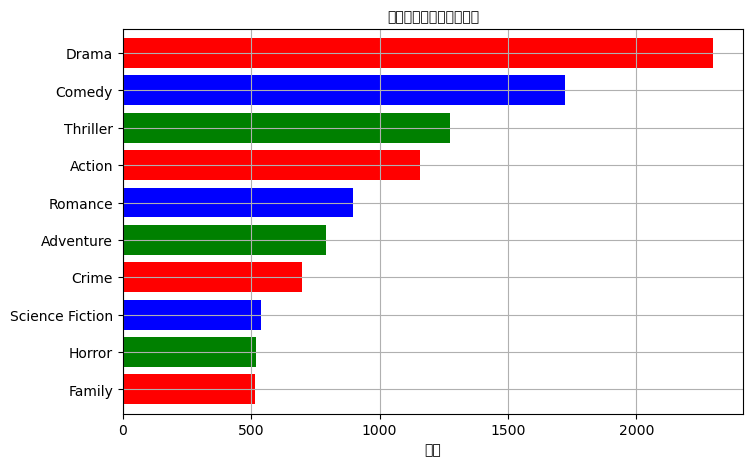

In [81]:
### 可视化
total.plot(kind='barh',figsize=(8,5),width=0.8,color=['r','g','b'])
plt.title('前十名电影类型数量对比',fontsize=10)
plt.xlabel('数量',fontsize=10)
plt.grid(True)
plt.show()

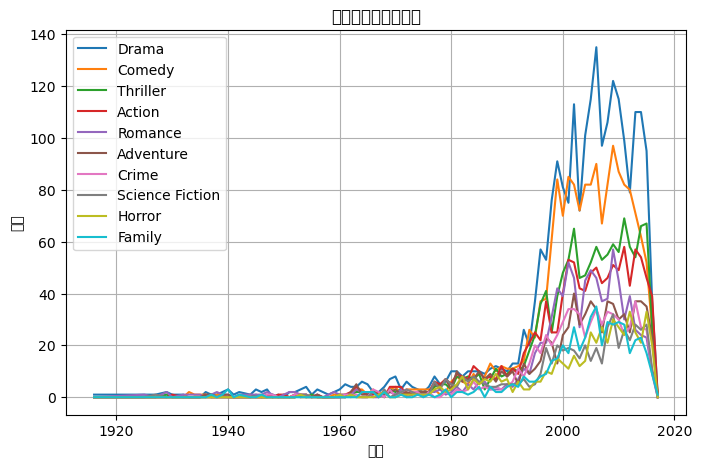

In [82]:
#电影类型随着时间变化
genresDf=genresDf[['Drama','Comedy','Thriller','Action','Romance','Adventure',
                   'Crime','Science Fiction','Horror','Family']]
genresDf.plot(figsize=(8,5))
plt.title('电影类型随时间变化')
plt.xlabel('时间')
plt.ylabel('数量')
plt.grid(True)
plt.show()